In [1]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
tensorflow.set_random_seed(200)

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#再現性を担保するhttps://qiita.com/okotaku/items/8d682a11d8f2370684c9
import os
import numpy as np
import random as rn
import tensorflow as tf

os.environ['PYTHONHASHSEED'] = '0'
np.random.seed(7)
rn.seed(7)

session_conf = tf.ConfigProto(
    intra_op_parallelism_threads=1,
    inter_op_parallelism_threads=1
)

from keras import backend as K

tf.set_random_seed(7)
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

Using TensorFlow backend.


In [3]:
iris=load_iris()

In [4]:
iris_data=iris.data
iris_target=iris.target

In [5]:
train_X,val_X, train_Y,val_Y=train_test_split(iris_data,iris_target, test_size=0.2)

print(len(train_X))
print(len(val_X))

120
30


In [6]:
model=Sequential([
    Dense(2, activation="relu",input_shape=(train_X.shape[1],)),
    Dense(2, activation="relu"),
    Dense(3)])

model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy",metrics=["acc"])
#model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
epochs=10
batch_size=4
history=model.fit(train_X,train_Y,epochs=epochs,batch_size=batch_size,verbose=0,validation_data=(val_X,val_Y))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


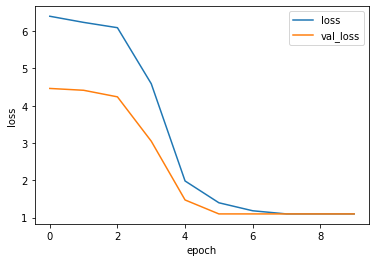

In [8]:
plt.plot(range(epochs), history.history['loss'], label="loss")
plt.plot(range(epochs), history.history['val_loss'], label='val_loss')
plt.xlabel('epoch')
plt.ylabel("loss")
plt.legend()
plt.show()

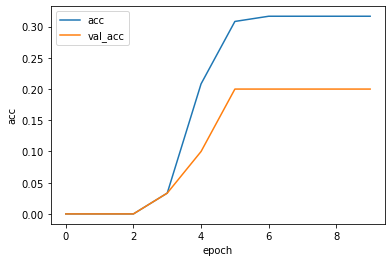

In [9]:
plt.plot(range(epochs), history.history['acc'], label="acc")
plt.plot(range(epochs), history.history['val_acc'], label='val_acc')
plt.xlabel('epoch')
plt.ylabel("acc")
plt.legend()
plt.show()

In [10]:
model.save("iris_model.h5")